In [1]:
# import libraries
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
import tables
sys.path.append('/home/ahinners/.local/lib/python3.11/site-packages')
import simweights

In [2]:
# Load in half the SIBYLL2.1 particle sims (The kernel might crash otherwise)
proton_filelist = glob.glob("/data/ana/CosmicRay/IceTop_level3/sim/IC86.2012/SIBYLL2.1/p/12360_v1s/h5files/*.h5")
helium_filelist = glob.glob('/data/ana/CosmicRay/IceTop_level3/sim/IC86.2012/SIBYLL2.1/He/12630_v1s/h5files/*.h5')

bigfilelist = proton_filelist + helium_filelist

In [3]:
# Load in the other hlaf of SIBYLL2.1 particle sims
oxygen_filelist = glob.glob('/data/ana/CosmicRay/IceTop_level3/sim/IC86.2012/SIBYLL2.1/O/12631_v1s/h5files/*.h5')
iron_filelist = glob.glob("/data/ana/CosmicRay/IceTop_level3/sim/IC86.2012/SIBYLL2.1/Fe/12362_v1s/h5files/*.h5")

bigfilelist += oxygen_filelist + iron_filelist

In [4]:
# Set the weighter for the data
weighter = None
for filename in bigfilelist:
    file_obj = tables.open_file(filename, "r")
    if weighter is None:
        weighter = simweights.IceTopWeighter(file_obj)
    else:
        weighter += simweights.IceTopWeighter(file_obj)

In [5]:
primary_energy = weighter.get_column("MCPrimary", "energy")
# (p, He, N, Al, Fe) version of this model.
fluxH = simweights.GaisserH4a_IT()

# Get the weights by passing the flux to the weighter
weights = weighter.get_weights(fluxH)

type = weighter.get_column('MCPrimary', 'type')

In [6]:
# Set composition cuts
prot_cut = weighter.get_column('MCPrimary', 'type') == 2.21200000e+03
eli_cut = weighter.get_column('MCPrimary', 'type') == 1.00002004e+09
oxy_cut = weighter.get_column('MCPrimary', 'type') == 1.00008016e+09
iron_cut = weighter.get_column('MCPrimary', 'type') == 1.00026056e+09

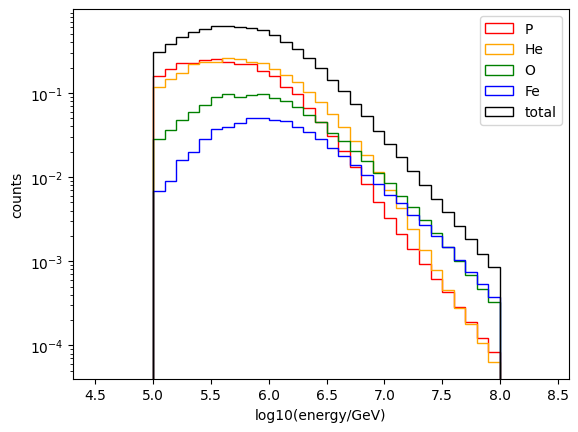

In [19]:
# Graph Log10 Energy vs Log 10 weighted counts
bins = np.arange(4.5, 8.5, 0.1)
# Plot the composition vs. log10 energy.
(pwtH, bins, patches1) = plt.hist(np.log10(primary_energy[prot_cut]), bins = bins, log = True, weights=weights[prot_cut], color = 'red',histtype = 'step', label ='P')
(hwtH, bins, patches1) = plt.hist(np.log10(primary_energy[eli_cut]), bins = bins, log = True, weights=weights[eli_cut], color = 'orange',histtype = 'step', label = 'He') 
(owtH, bins, patches1) = plt.hist(np.log10(primary_energy[oxy_cut]), bins = bins, log = True, weights=weights[oxy_cut], color = 'green', histtype = 'step', label = 'O')
(iwtH, bins, patches1) = plt.hist(np.log10(primary_energy[iron_cut]), bins = bins, log=True, weights=weights[iron_cut], color='blue',histtype='step',label='Fe')
totH = pwtH + hwtH + owtH + iwtH
plt.hist(np.log10(primary_energy), bins = bins, log = True, weights=weights ,color = 'black', histtype = 'step', label = 'total')

plt.xlabel('log10(energy/GeV)')
plt.ylabel('counts')
plt.legend()


/tmp/ipykernel_13079/850736519.py:3: RuntimeWarning: invalid value encountered in divide
  pfracH4 = pwtH / totH
/tmp/ipykernel_13079/850736519.py:4: RuntimeWarning: invalid value encountered in divide
  hfracH4 = hwtH / totH
/tmp/ipykernel_13079/850736519.py:5: RuntimeWarning: invalid value encountered in divide
  ofracH4 = owtH / totH
/tmp/ipykernel_13079/850736519.py:6: RuntimeWarning: invalid value encountered in divide
  ifracH4 = iwtH / totH


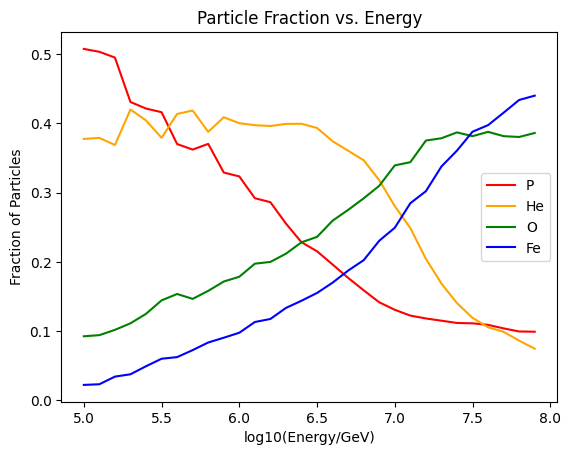

In [8]:
#attempts without dictionary

pfracH4 = pwtH / totH
hfracH4 = hwtH / totH
ofracH4 = owtH / totH
ifracH4 = iwtH / totH
plt.plot(bins[:-1], pfracH4, label = 'P', color='red')
plt.plot(bins[:-1], hfracH4, label = 'He', color='orange')
plt.plot(bins[:-1], ofracH4, label = 'O', color='green')
plt.plot(bins[:-1], ifracH4, label = 'Fe',color='blue')

plt.xlabel('log10(Energy/GeV)')
plt.ylabel('Fraction of Particles')
plt.title('Particle Fraction vs. Energy')

plt.legend()

/tmp/ipykernel_13079/496985467.py:8: RuntimeWarning: invalid value encountered in divide
  meanZH = totZ / totH


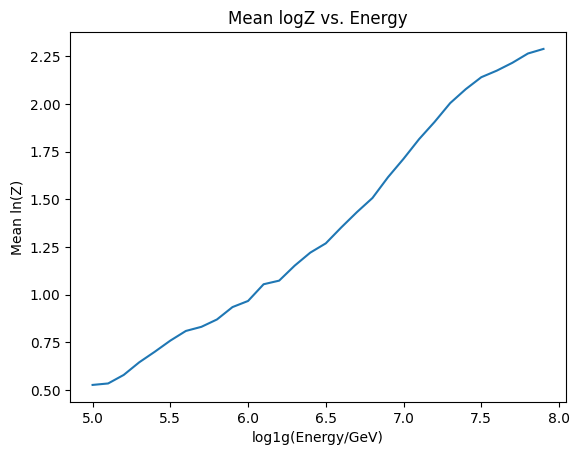

In [9]:
# Mean Atomic Charge (without dictionary)

PZ = pwtH * np.log(1)
HeZ = hwtH * np.log(2)
OZ = owtH * np.log(8)
FeZ = iwtH * np.log(26)
totZ = PZ + HeZ + OZ + FeZ
meanZH = totZ / totH
Mean_logZ_H4b = plt.plot(bins[:-1], meanZH)
plt.xlabel('log1g(Energy/GeV)')
plt.ylabel('Mean ln(Z)')
plt.title('Mean logZ vs. Energy')
plt.show()

In [11]:
# make a table of the overall percentage of particles
#
#pro_cent = len(primary_energy[CUTS['proton']])/len(primary_energy)
#eli_cent = len(primary_energy[CUTS['helium']])/len(primary_energy)
#oxy_cent = len(primary_energy[CUTS['oxygen']])/len(primary_energy)
#iro_cent = len(primary_energy[CUTS['iron']])/len(primary_energy)
#
#cent_table = [['proton', round(pro_cent, 3)], 
#              ['helium', round(eli_cent, 3)],
#              ['oxygen', round(oxy_cent, 3)],
#              ['iron', round(iro_cent, 3)]]
#
#for row in cent_table:
#    print(row)

In [12]:
fluxG = simweights.GlobalSplineFit_IT()
weightG = weighter.get_weights(fluxG)

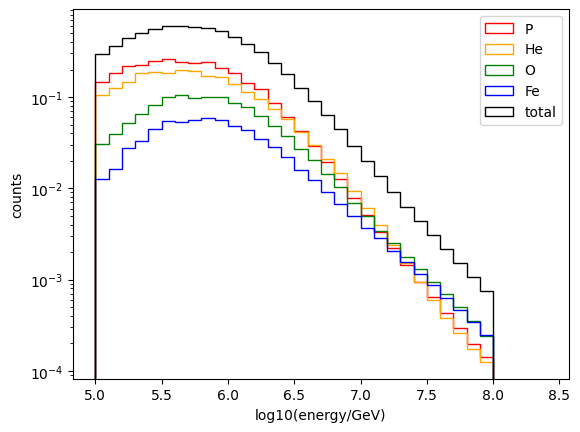

In [13]:
bins = np.arange(5, 8.5, 0.1)

(pwtG, bins, patches1) = plt.hist(np.log10(primary_energy[prot_cut]), bins = bins, log = True, weights=weightG[prot_cut], color = 'red',histtype = 'step', label ='P')
(hwtG, bins, patches1) = plt.hist(np.log10(primary_energy[eli_cut]), bins = bins, log = True, weights=weightG[eli_cut], color = 'orange',histtype = 'step', label = 'He') 
(owtG, bins, patches1) = plt.hist(np.log10(primary_energy[oxy_cut]), bins = bins, log = True, weights=weightG[oxy_cut], color = 'green', histtype = 'step', label = 'O')
(iwtG, bins, patches1) = plt.hist(np.log10(primary_energy[iron_cut]), bins = bins, log=True, weights=weightG[iron_cut], color='blue',histtype='step',label='Fe')
totG = pwtG + hwtG + owtG + iwtG
plt.hist(np.log10(primary_energy), bins = bins, log = True, weights=weightG, color = 'black', histtype = 'step', label = 'total')

plt.xlabel('log10(energy/GeV)')
plt.ylabel('counts')
plt.legend()


/tmp/ipykernel_13079/856213134.py:1: RuntimeWarning: invalid value encountered in divide
  pfracGSF = pwtG / totG
/tmp/ipykernel_13079/856213134.py:2: RuntimeWarning: invalid value encountered in divide
  hfracGSF = hwtG / totG
/tmp/ipykernel_13079/856213134.py:3: RuntimeWarning: invalid value encountered in divide
  ofracGSF = owtG / totG
/tmp/ipykernel_13079/856213134.py:4: RuntimeWarning: invalid value encountered in divide
  ifracGSF = iwtG / totG


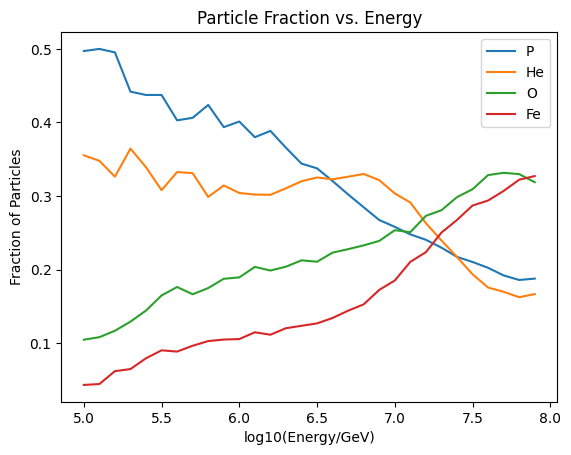

In [14]:
pfracGSF = pwtG / totG
hfracGSF = hwtG / totG
ofracGSF = owtG / totG
ifracGSF = iwtG / totG
plt.plot(bins[:-1], pfracGSF, label = 'P')
plt.plot(bins[:-1], hfracGSF, label = 'He')
plt.plot(bins[:-1], ofracGSF, label = 'O')
plt.plot(bins[:-1], ifracGSF, label = 'Fe')

plt.xlabel('log10(Energy/GeV)')
plt.ylabel('Fraction of Particles')
plt.title('Particle Fraction vs. Energy')

plt.legend()


/tmp/ipykernel_13079/263662387.py:6: RuntimeWarning: invalid value encountered in divide
  meanZG = totZ / totG


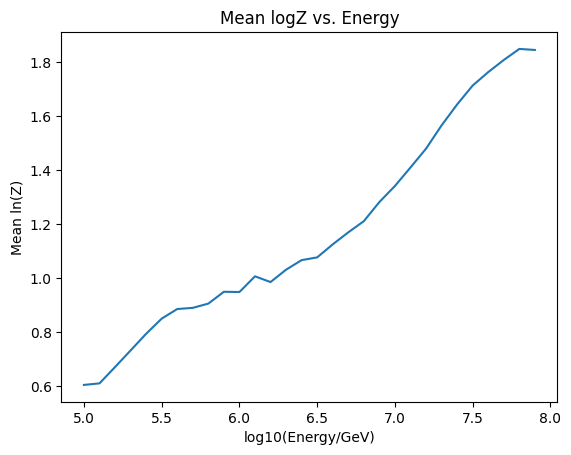

In [15]:
PZ = pwtG * np.log(1)
HeZ = hwtG * np.log(2)
OZ = owtG * np.log(8)
FeZ = iwtG * np.log(26)
totZ = PZ + HeZ + OZ + FeZ
meanZG = totZ / totG
Mean_logZ_GSF = plt.plot(bins[:-1], meanZG)
plt.xlabel('log10(Energy/GeV)')
plt.ylabel('Mean ln(Z)')
plt.title('Mean logZ vs. Energy')
plt.show()

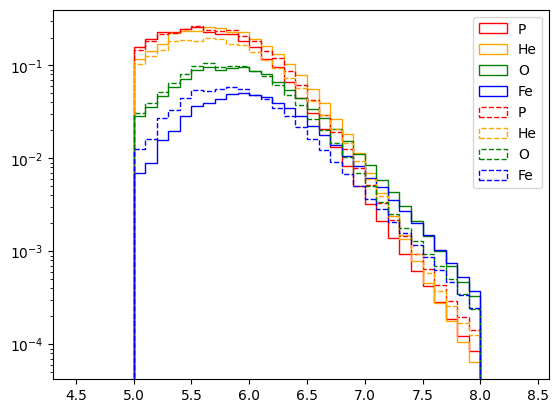

In [21]:
bins = np.arange(4.5, 8.5, 0.1)

(pwtH, bins, patches1) = plt.hist(np.log10(primary_energy[prot_cut]), bins = bins, log = True, weights=weights[prot_cut], color = 'red',histtype = 'step', label ='P')
(hwtH, bins, patches1) = plt.hist(np.log10(primary_energy[eli_cut]), bins = bins, log = True, weights=weights[eli_cut], color = 'orange',histtype = 'step', label = 'He') 
(owtH, bins, patches1) = plt.hist(np.log10(primary_energy[oxy_cut]), bins = bins, log = True, weights=weights[oxy_cut], color = 'green', histtype = 'step', label = 'O')
(iwtH, bins, patches1) = plt.hist(np.log10(primary_energy[iron_cut]), bins = bins, log=True, weights=weights[iron_cut], color='blue',histtype='step',label='Fe')

(pwtG, bins, patches1) = plt.hist(np.log10(primary_energy[prot_cut]), bins = bins, log = True, weights=weightG[prot_cut], color = 'red',histtype = 'step', label ='P', linestyle = '--')
(hwtG, bins, patches1) = plt.hist(np.log10(primary_energy[eli_cut]), bins = bins, log = True, weights=weightG[eli_cut], color = 'orange',histtype = 'step', label = 'He', linestyle = '--') 
(owtG, bins, patches1) = plt.hist(np.log10(primary_energy[oxy_cut]), bins = bins, log = True, weights=weightG[oxy_cut], color = 'green', histtype = 'step', label = 'O', linestyle = '--')
(iwtG, bins, patches1) = plt.hist(np.log10(primary_energy[iron_cut]), bins = bins, log=True, weights=weightG[iron_cut], color='blue',histtype='step',label='Fe', linestyle = '--')

plt.legend()

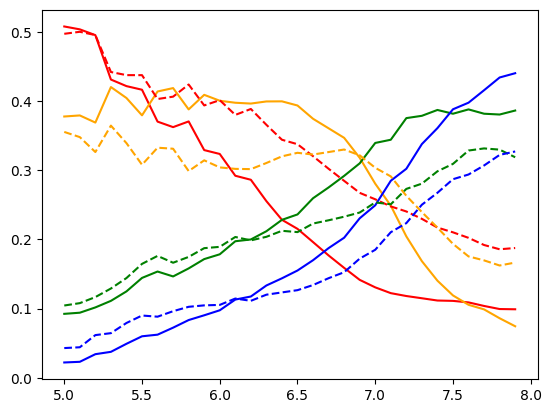

In [17]:
# Fractional Plots with GaaisserH4a_IT weighter
plt.plot(bins[:-1], pfracH4, label = 'P (H4a)', color= 'red')
plt.plot(bins[:-1], hfracH4, label = 'He (H4a)', color = 'orange')
plt.plot(bins[:-1], ofracH4, label = 'O (H4a)', color = 'green')
plt.plot(bins[:-1], ifracH4, label = 'Fe (H4a)', color = 'blue')

# Fractional Plots with GlobalSplineFit_IT weighter
plt.plot(bins[:-1], pfracGSF, label = 'P (GSF)', ls = '--', color = 'red')
plt.plot(bins[:-1], hfracGSF, label = 'He (GSF)', ls = '--', color = 'orange')
plt.plot(bins[:-1], ofracGSF, label = 'O (GSF)', ls = '--', color = 'green')
plt.plot(bins[:-1], ifracGSF, label = 'Fe (GSF)', ls = '--', color = 'blue')

#plt.legend()

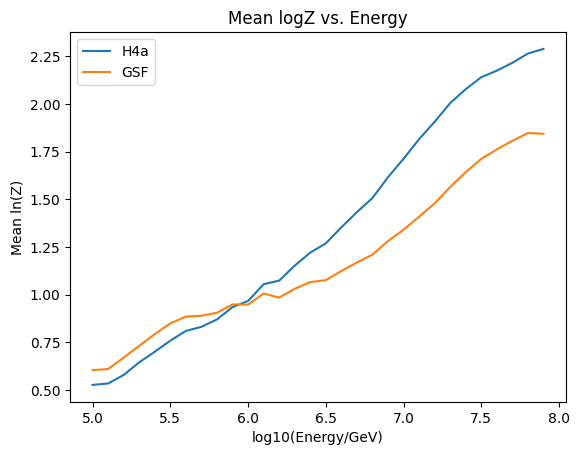

In [18]:
Mean_logZ_H4b = plt.plot(bins[:-1], meanZH, label = 'H4a')
Mean_logZ_GSF = plt.plot(bins[:-1], meanZG, label = 'GSF')
plt.xlabel('log10(Energy/GeV)')
plt.ylabel('Mean ln(Z)')
plt.title('Mean logZ vs. Energy')
plt.legend()
plt.show()